# 심장병 분류
- 실제로 심장병인 데이터들 중에서 얼만큼 제대로 예측하는 게 중요한 task

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.4

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.datasets import get_data

In [4]:
data = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [5]:
# 데이터 탐색
# 데이터의 처음 몇 행을 출력하여 데이터 구조를 확인합니다.
print("Data Rows:\n", data.head())
# 데이터의 기술 통계량을 출력하여 데이터 분포를 파악합니다.
print("\n DATA STATICS:\n", data.describe())
# 데이터 내 누락값을 확인하여 데이터 전처리 필요성을 검토합니다.
print("\n NULL IN DATA :\n", data.isnull().sum())

Data Rows:
    age  sex  chest pain type  resting blood pressure  \
0   70    1                4                     130   
1   67    0                3                     115   
2   57    1                2                     124   
3   64    1                4                     128   
4   74    0                2                     120   

   serum cholestoral in mg/dl        fasting blood sugar > 120 mg/dl   \
0                               322                                 0   
1                               564                                 0   
2                               261                                 0   
3                               263                                 0   
4                               269                                 0   

   resting electrocardiographic results  maximum heart rate achieved    \
0                                     2                            109   
1                                     2                         

In [16]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

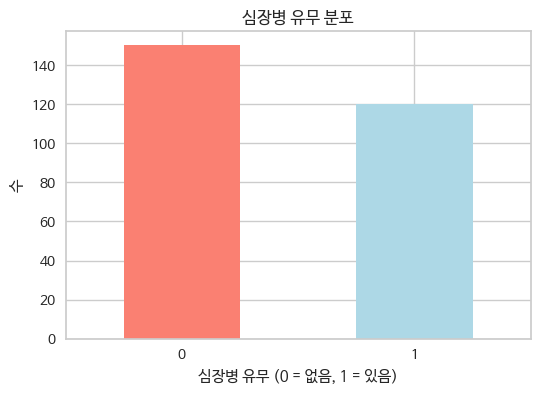

In [7]:
# 타겟 변수 분포 시각화
# 심장병 유무 분포를 막대 그래프로 시각화하여 데이터 불균형을 확인합니다.
plt.figure(figsize=(6, 4))
data['Disease'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('심장병 유무 분포')
plt.xlabel('심장병 유무 (0 = 없음, 1 = 있음)')
plt.ylabel('수')
plt.xticks(rotation=0)
plt.show()
# 심장병 유무 환자에 따라 불균형이 심하니 않으니, SMOTE나 언더샘플링은 사용하지 않아도 되겠다.

In [8]:
# PyCaret의 setup 함수를 사용하여 데이터 전처리 및 분석 환경을 설정합니다.
# 이 과정에서 데이터 정규화, 이상치 제거 등의 전처리가 자동으로 수행됩니다.
clf1 = setup(data=data, target='Disease', session_id=123,
             normalize=True, remove_outliers=True)

,Description,Value
0,Session id,123
1,Target,Disease
2,Target type,Binary
3,Original data shape,"(270, 14)"
4,Transformed data shape,"(260, 14)"
5,Transformed train set shape,"(179, 14)"
6,Transformed test set shape,"(81, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [9]:
# 여러 기계 학습 모델을 자동으로 학습시키고, 그 성능을 비교하여 최적의 모델을 선택합니다.
best_model = compare_models()
# 성능이 가장 좋은 모델을 선택하고, 하이퍼파라미터 튜닝을 통해 성능을 최적화합니다.
tuned_model = tune_model(best_model, optimize='Accuracy')
# 베스트 모델은 릿지 분류!
# tune한 모델이 original 모델보다 나쁘므로 그냥 original 택해서 쓰라는 문구
# accuracy를 더 올리고 싶다면 전처리를 파이캐럿에 맡기지 말고 직접 해보기!!

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8520,0.0000,0.7750,0.8964,0.8057,0.6931,0.7176,0.1930
lda,Linear Discriminant Analysis,0.8520,0.8801,0.7750,0.8964,0.8057,0.6931,0.7176,0.1960
lr,Logistic Regression,0.8468,0.8665,0.7875,0.8756,0.8060,0.6848,0.7067,1.1690
rf,Random Forest Classifier,0.8418,0.7157,0.7875,0.8612,0.8112,0.6766,0.6913,0.3680
et,Extra Trees Classifier,0.8363,0.7324,0.7875,0.8521,0.8076,0.6657,0.6804,0.4080
nb,Naive Bayes,0.8310,0.7766,0.8111,0.8326,0.7994,0.6571,0.6764,0.2050
lightgbm,Light Gradient Boosting Machine,0.8044,0.6961,0.7264,0.8307,0.7613,0.5981,0.6159,0.3190
qda,Quadratic Discriminant Analysis,0.7994,0.5325,0.7861,0.7886,0.7667,0.5910,0.6169,0.2020
xgboost,Extreme Gradient Boosting,0.7942,0.6321,0.7167,0.8076,0.7464,0.5762,0.5931,0.2810
knn,K Neighbors Classifier,0.7889,0.7054,0.7181,0.8329,0.7451,0.5705,0.5969,0.2190


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7895,0.0000,0.6250,0.8333,0.7143,0.5529,0.5673
1,0.8947,0.0000,0.8750,0.8750,0.8750,0.7841,0.7841
2,0.8947,0.0000,0.7500,1.0000,0.8571,0.7765,0.7966
3,0.7895,0.0000,0.5000,1.0000,0.6667,0.5366,0.6055
4,0.9474,0.0000,1.0000,0.8889,0.9412,0.8939,0.8989
5,0.9474,0.0000,1.0000,0.9000,0.9474,0.8950,0.9000
6,0.8947,0.0000,0.8889,0.8889,0.8889,0.7889,0.7889
7,0.7895,0.0000,0.7778,0.7778,0.7778,0.5778,0.5778
8,0.6842,0.0000,0.3333,1.0000,0.5000,0.3448,0.4564


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
# 모델 평가
# 선택된 모델의 성능을 다양한 관점에서 평가합니다.
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
# 모델 예측
# 튜닝된 모델을 사용하여 데이터셋에 대한 예측을 수행합니다.
predictions = predict_model(tuned_model)
# 모델의 예측값을 보여준다.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8642,0.8611,0.8333,0.8571,0.8451,0.7242,0.7245


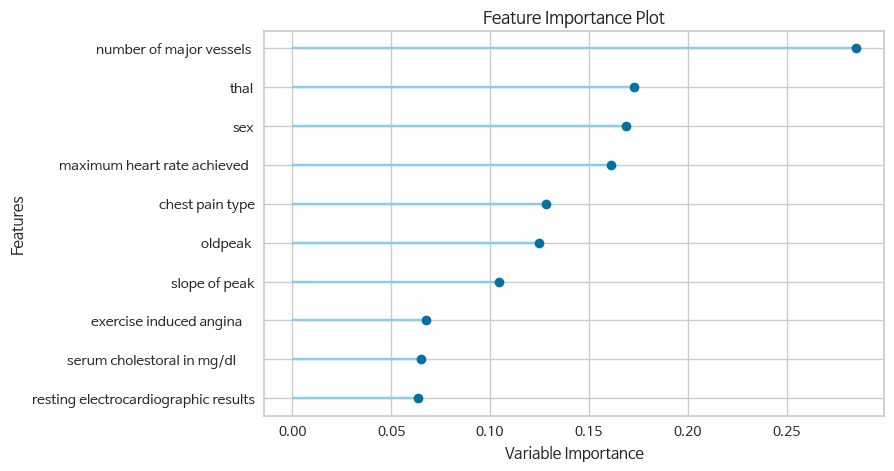

In [12]:
# 특성 중요도 시각화
# 모델에서 가장 중요한 특성을 시각화하여 어떤 변수가 예측에 큰 영향을 미치는지 확인합니다.
plot_model(tuned_model, plot='feature')

- 파이캐럿으로 빠르게 모델을 한 번 만든 후에, 디폴트 모델보다 좋게 하기 위해 더한 전처리, 바꿔 본 모델을 만들어봐라
- 파이캐럿 모델과 직접 만져본 모델의 accuracy 차이를 비교하기